# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования:**
Используя данные сервиса Яндекс.Недвижимость необходимо выявить основные параметры и факторы, влияющие на рыночную цену квартиры.

**Задачи исследования:**
1. Получение данных и первичный осмотр данных.
2. Предобработка данных: поиск дубликатов, пропусков, аномалий. Исправление, удаление данных.
3. Добавление в датасет новых показателей:
цена квадратного метра; 
день недели, месяц и год публикации объявления; 
этаж квартиры; варианты — первый, последний, другой.
4. Исследовательский анализ:
 анализ всего датасета, выявление зависимости цены от показателей квартиры;
 анализ квартир, находящихся в центре Санкт-Петербурга.


### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #загружаю библиотеки

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t') #открываю данные

In [3]:
data.info() #изучаю общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head() #вывожу первые строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


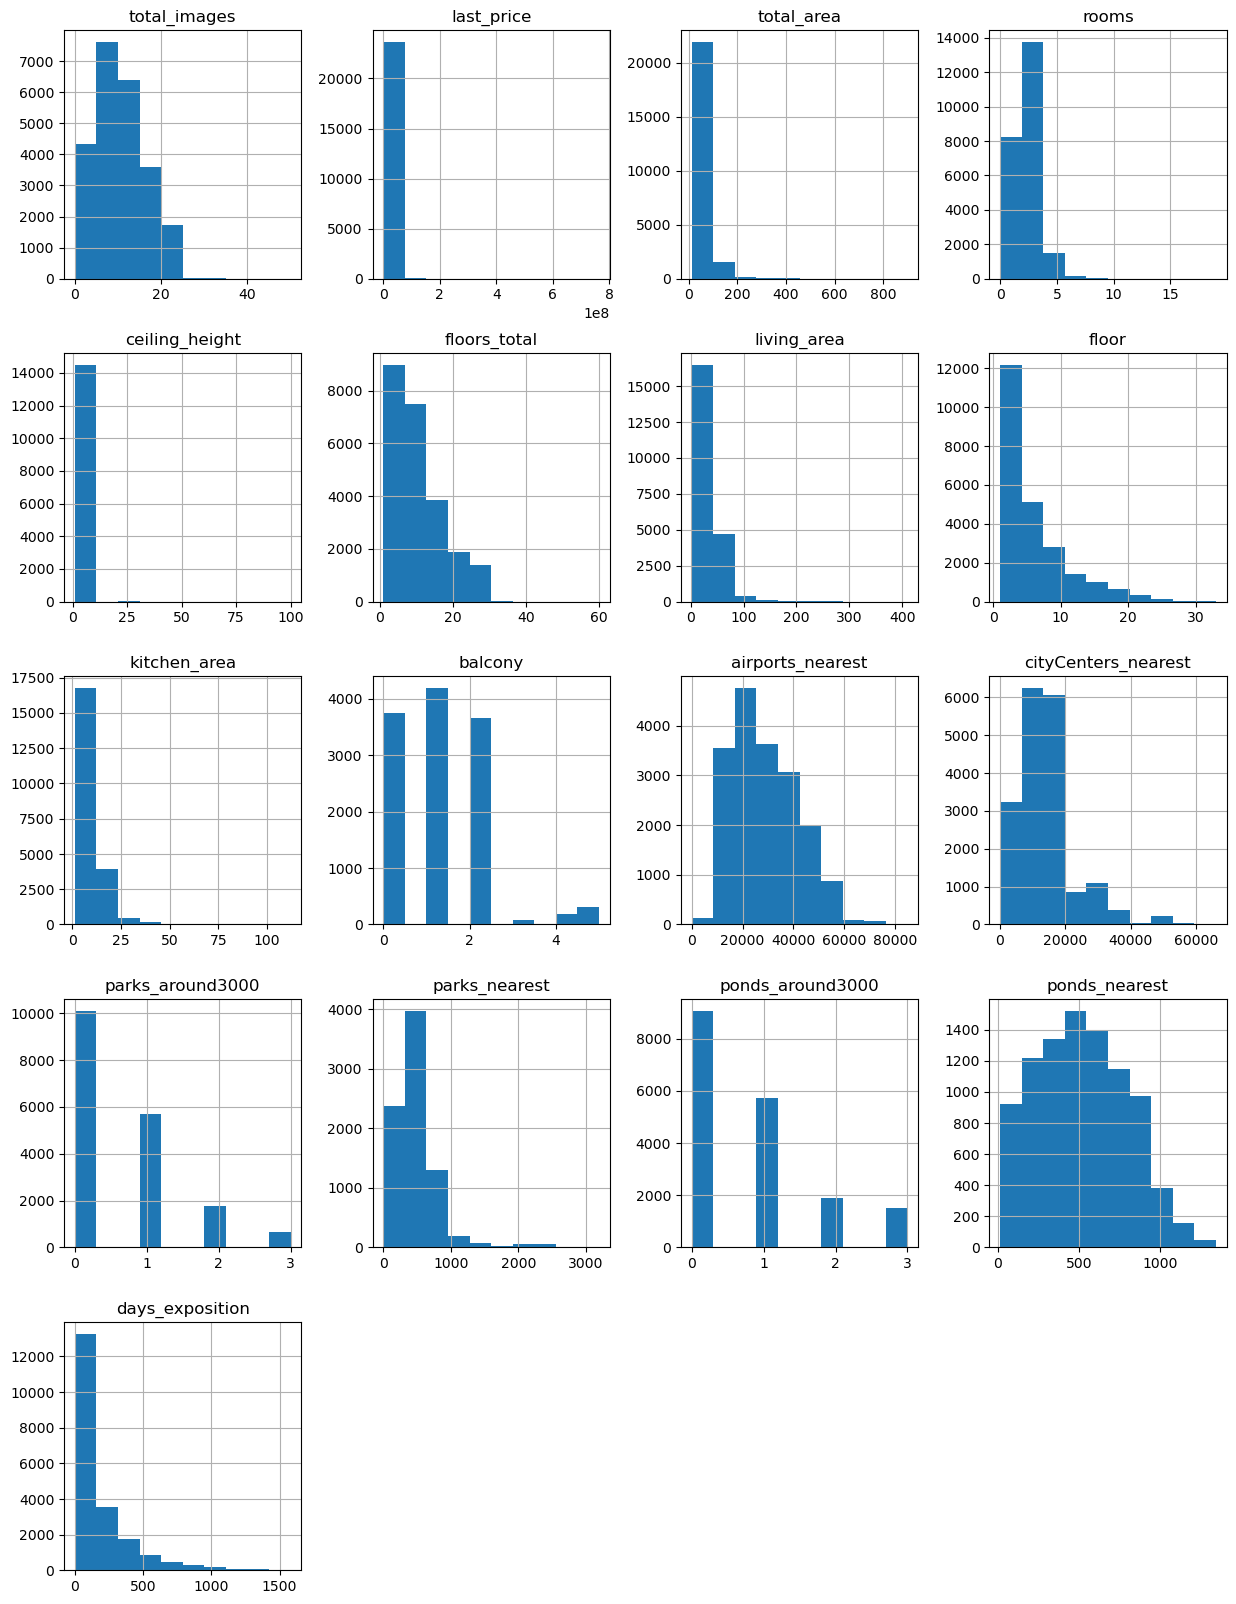

In [5]:
data.hist(figsize=(15, 20)) #строю гистограмму для всех числовых столбцов таблицы 
plt.show()

**Вывод:**

В данных 23699 строк. Есть пропущенные значения и некорректный тип данных. На гистограммах видно, что в данных есть аномальные значения

### Выполните предобработку данных

**Переименование столбцов**

Приведу названия столбцов к стандартоному виду

In [6]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True ) 

**Удаление пропусков**

In [7]:
data.isna().sum() #смотрю, в каких стобцах есть пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В части столбцов нужно заменить пропуски. 

Для числовых столбцов ceiling_height, floors_total, living_area, kitchen_area буду использовать медиану, чтобы избежать искажений из-за выбросов

In [8]:
numerical_cols = ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

Заменим пропуски в balcony и is_apartment:

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

In [10]:
data.isna().sum() #посмотрим, как изменилось число пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для всех столбцов, связанных с расстоянием и для столбца days_exposition, не будем вносить изменения
Пропуски в данных могли возникнуть по нескольким причинам:

1. Ошибки ввода данных
2. Технические сбои
3. Изменение определений или стандартов

**Изменение типов данных**

In [11]:
data.info() #проверяю тип данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Данные в столбце first_day_exposition должны иметь тип datetime64. В столбцах floors_total и balconyдолжны быть данные типа int64, т.к. это всегда целые числа. Дааные столбца is_apartment нужно привести к типу bool. Столбцы parks_around3000, ponds_around3000, days_exposition оставим без изменений, так как в них остались пропуски, которые нельзя заменить

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #привожу данные столбца 'first_day_exposition' к формату datetime

In [13]:
int_cols = ['floors_total', 'balcony']
for col in int_cols:
    data[col] = data[col].astype('int64')

In [14]:
# заменяю тип данных на "bool"
data['is_apartment'] = data['is_apartment'].astype(bool)

In [15]:
data.info() #проверяю тип данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Устарнение дубликатов**

In [16]:
data.duplicated().sum() #проверяю наличие явных дубликатов

0

Явных дубликатов нет

In [17]:
data.locality_name.sort_values().unique() #вывожу уникальные значения столбца locality_name 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Чтобы избавиться от неявных повторов в locality_name приведем все к нижнему регистру и уберем типы населенных пунктов

In [18]:
data['locality_name'] = data['locality_name'].str.lower()#привожу к нижнему регистру

#оставляю только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
data.duplicated().sum() #проверяю на наличие явных дубликатов

0

In [19]:
data.locality_name.sort_values().unique() #вывожу уникальные значения столбца locality_name 

array(['69-й километр', 'агалатово', 'александровская', 'алексеевка',
       'аннино', 'аро', 'барышево', 'батово', 'бегуницы', 'белогорка',
       'белоостров', 'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'ваганово',
       'важины', 'вартемяги', 'вахнова кара', 'вещево', 'вознесенье',
       'возрождение', 'войсковицы', 'войскорово', 'володарское',
       'волосово', 'волхов', 'всеволожск', 'выборг', 'вырица', 'выскатка',
       'высокоключевой', 'высоцк', 'гаврилово', 'гарболово', 'гатчина',
       'гладкое', 'глажево', 'глебычево', 'глинка', 'гончарово',
       'горбунки', 'городской большая ижора', 'городской будогощь',
       'городской виллози', 'городской лесогорский', 'городской мга',
       'городской назия', 'городской новоселье', 'городской павлово',
       'городской рощино', 'городской свирьстрой', 'городской советский',
       'городской федо

**Вывод:**
В процессе предобработки данных были внесены следующие изменения:

1. Название столбца cityCenters_nearest заменено на сity_centers_nearest

2. Была ппроизведена замена пропусков в нескольких стобцах. В ceiling_height, floors_total, living_area, kitchen_area пропущенные значения заменены медианными. В столбце balcony пропуски заменены на 0. А в стобце is_apartment на False.

3. Изменен тип данных в нескольких столбцах. Данные в столбце first_day_exposition теперь имеют тип datetime64. В столбцах floors_total и balcony тип данных заменен на int64. Дааные столбца is_apartment приведены к типу bool.

4. Столбец locality_name избавлен от неявных дубликатов

### Добавьте в таблицу новые столбцы

В таблицу нужно добавить следующие столбцы:

square_meter_price - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

publication_day - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

publication_month - месяц публикации объявления;

publication_year - год публикации объявления;

floor_type - тип этажа квартиры (значения — «первый», «последний», «другой»);

center_km - расстояние до центра города в километрах

In [20]:
#создаю столбец с ценой одного квадратного метра
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2)

#создаю столбец с днем недели публикации
data['publication_day'] = data['first_day_exposition'].dt.weekday

#создаю столбец с месяцем публикации
data['publication_month'] = data['first_day_exposition'].dt.month

#создаю столбец с годом публикации
data['publication_year'] = data['first_day_exposition'].dt.year

#создаю столбец с типом этажа квартиры
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor, axis=1)

#создаю столбец с расстоянием от центра в километрах
data['center_km'] = (data['city_centers_nearest'] / 1000).round(0)

#вывожу первые строки таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,publication_day,publication_month,publication_year,floor_type,center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [21]:
data['floor_type'].unique()#проверяю работу функции

array(['другой', 'первый', 'последний'], dtype=object)

### Проведите исследовательский анализ данных

Изучим отдельные параметры объектов недвижимости

**Общая площадь**

In [22]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

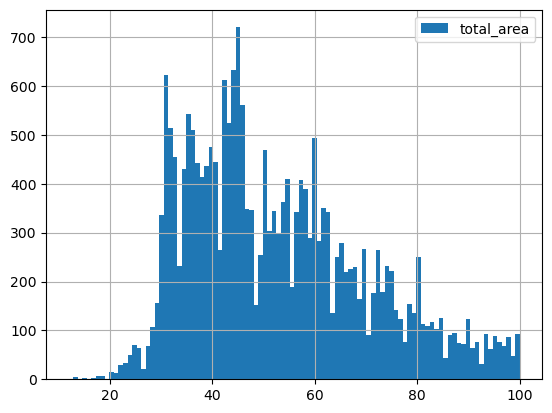

In [23]:
data['total_area'].hist(bins=100, range=(12,100),legend='total_area')
plt.show()

**Вывод:**
В наборе данных преобладают объекты общей площадью 40-48 кв.м.

**Жилая площадь**

In [24]:
data['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

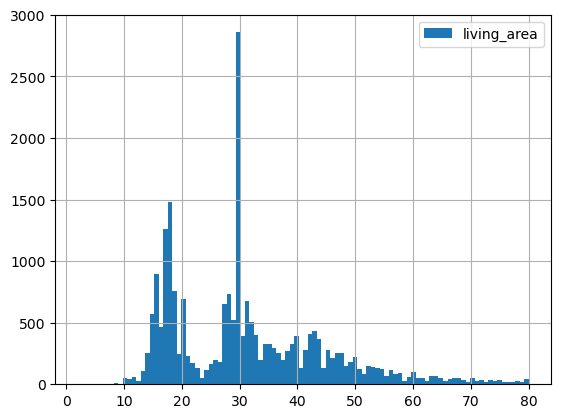

In [25]:
data['living_area'].hist(bins=100, range=(2,80),legend='total_area')
plt.show()

**Вывод:** У большинства объектов недвижимости жилая площадь составляет 30 кв.м. Однако также наблюдается большое количество объектов жилой площадью менее 20 кв.м.

**Площадь кухни**

In [26]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

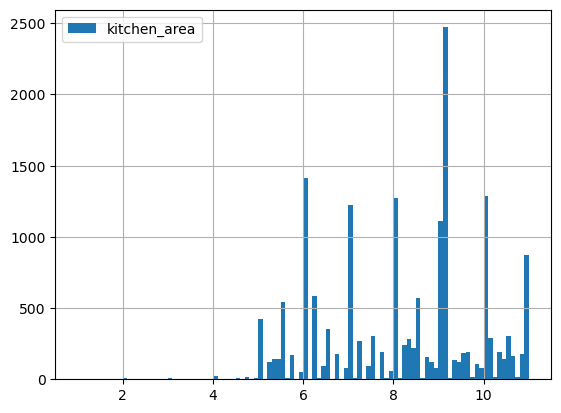

In [27]:
data['kitchen_area'].hist(bins=100, range=(1,11),legend='total_area')
plt.show()

**Вывод:** Наиболее часто встречаемая площадь кухни 6-11 кв. м. (чаще всего около 9)

**Цена объекта**

In [28]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

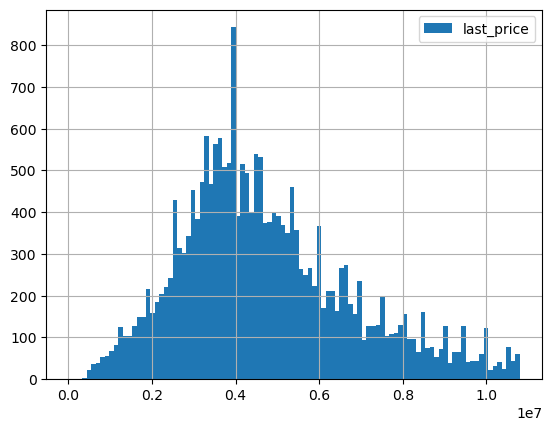

In [29]:
data['last_price'].hist(bins=100, range=(1.219000e+04,10.800000e+06),legend='last_price')
plt.show()

**Вывод:** наиболее часто цена объекта составляет 3,4 - 6,8 миллиона

**Количество комнат**

In [30]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

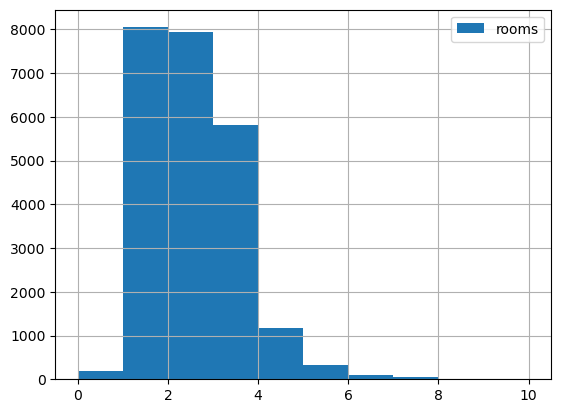

In [31]:
data['rooms'].hist(bins=10, range=(0,10),legend='rooms')
plt.show()

**Вывод:** В основном на рынке представлены одно- и двухкомнатные квартиры

**Высота потолков**

In [32]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Заменим очевидную аномалию в высоте потолков:

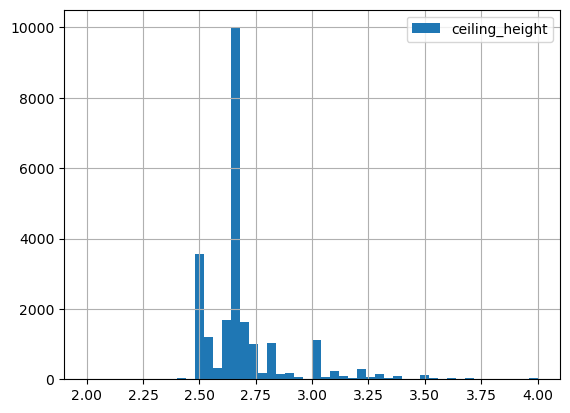

In [33]:
data.loc[data['ceiling_height'] >= 25.0, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].hist(bins=50, range=(2,4),legend='ceiling_height')
plt.show()

**Вывод:** После удаления аномальных значений, было выяснено, что в основном высота потолков в объектах недвижимости равна 2.65 м

**Тип этажа квартиры**

<Axes: >

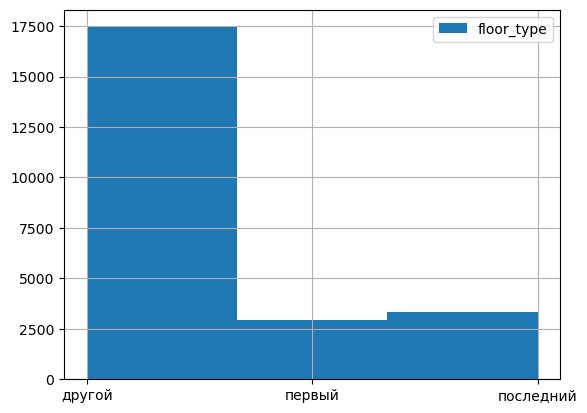

In [34]:
data['floor_type'].hist(bins=3,legend='floor_type')

**Вывод:** Большая часть продаваемых квартир находится не на первом и последнем этажах

**Общее количество этажей в доме**

In [35]:
data['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

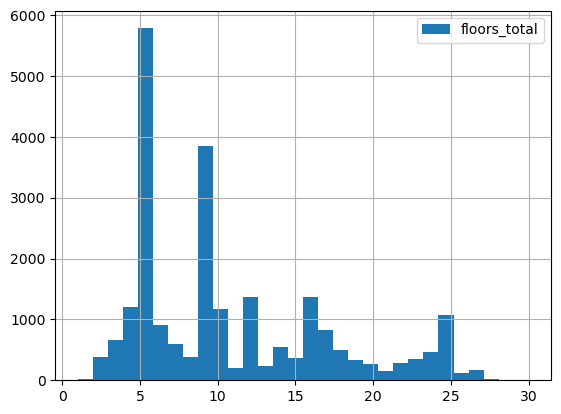

In [36]:
data['floors_total'].hist(bins=30, range=(1,30),legend='floors_total')
plt.show()

**Вывод:** В основном продваемые квартиры находятся в 5- и 9-этажных домах

**Расстояние до центра города**

In [37]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

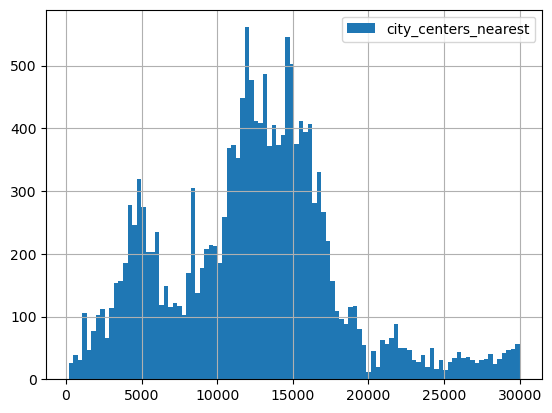

In [38]:
data['city_centers_nearest'].hist(bins=100, range=(200,30000),legend='city_centers_nearest')
plt.show()

**Вывод:** Больше всего предложений о продаже на окраинах города (на расстоянии 12000 -18000 метров)), и на расстоянии в 5000 метров от центра города.

**Расстояние до ближайшего парка**

In [39]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

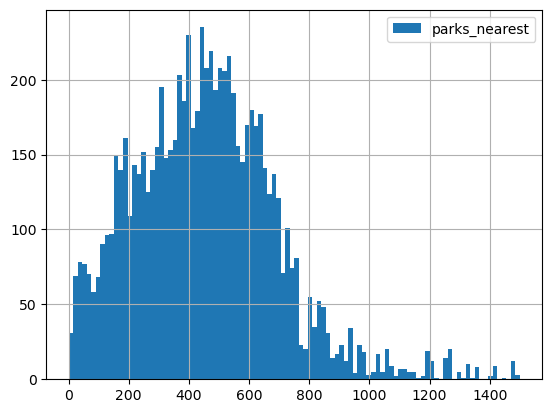

In [40]:
data['parks_nearest'].hist(bins=100, range=(1,1500),legend='city_centers_nearest')
plt.show()

**Вывод:** Подавляющее большинство продающихся объектов недвижимости расположено в менее чем 800 м от парка

**Общие выводы по разделу**
1. В наборе данных преобладают объекты общей площадью 40-48 кв.м.
2.  У большинства объектов недвижимости жилая площадь составляет 30 кв.м. Однако также наблюдается большое количество объектов жилой площадью менее 20 кв.м.
3. Наиболее часто встречаемая площадь кухни 6-11 кв. м. (чаще всего около 9)
4. Цена объекта недвижимости в основном составляет 3,4 - 6,8 миллиона
5. В основном на рынке представлены одно- и двухкомнатные квартиры
6. В основном высота потолков в объектах недвижимости равна 2.65 м
7.  Большая часть продаваемых квартир находится не на первом и последнем этажах
8.  основном продваемые квартиры находятся в 5- и 9-этажных домах
9. Больше всего предложений о продаже на окраинах города (на расстоянии 12000 -18000 метров)), и на расстоянии в 5000 метров от центра города.
10. Подавляющее большинство продающихся объектов недвижимости расположено в менее чем 800 м от парка

**Заключение по разделу:**

Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. м с кухней в 6 кв. м, высотой потолков 2,65 м, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. отцентра города.

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

**Исследование скорости продажи квартир**

In [41]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

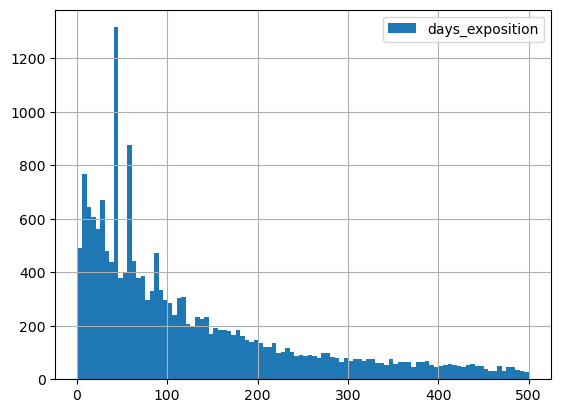

In [42]:
data['days_exposition'].hist(bins=100, range=(1,500),legend='days_exposition')
plt.show()

**Вывод:** В среднем квартиры продаются за 180 дней. 25% квартир продается менее чем за 45 дней, такие продажи можно назвать быстрыми. Медленными можно назвать продажи, которое присходят более чем через 7 месяцев после публикации объявления

**Определение факторов, влияющих на общую (полную) стоимость объекта**

Напишем функцию, которая будет строить диаграмму рассеяния и вычислять коэффициент Пирсона 

In [43]:
def plot_and_correlate(data, x, y):
    """
    Строит диаграмму рассеяния между двумя переменными и 
    вычисляет коэффициент корреляции между ними.

    data: DataFrame с данными.
    x: Строка, название столбца для оси X.
    y: Строка, название столбца для оси Y.
    """
    if x not in data.columns or y not in data.columns:
        raise ValueError(f'Оба столбца должны быть в DataFrame: {x}, {y}')

    # Построение диаграммы рассеяния
    data.plot(x=x, y=y, kind='scatter', grid=True)

    # Вычисление коэффициента корреляции
    correlation = data[x].corr(data[y])
    print(f'Коэффициент корреляции между {x} и {y}: {correlation}')

**Зависимость цены от общей площади объекта:**

Коэффициент корреляции между total_area и last_price: 0.653675057965725


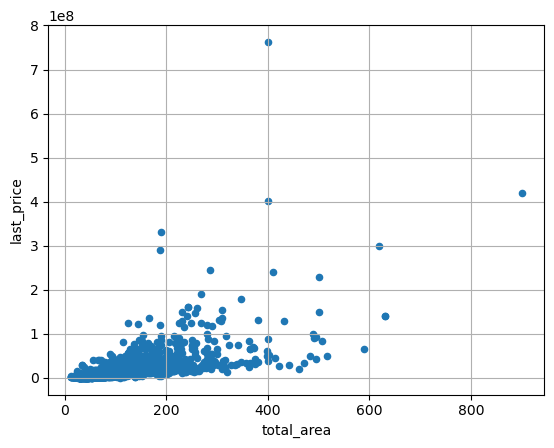

In [44]:
plot_and_correlate(data, 'total_area', 'last_price')

С ростом общей площади растет и цена, при этом также увеличивается разброс цен на объекты одинаковой площади

**Зависимость цены от жилой площади объекта:**

Коэффициент корреляции между living_area и last_price: 0.5406588415034874


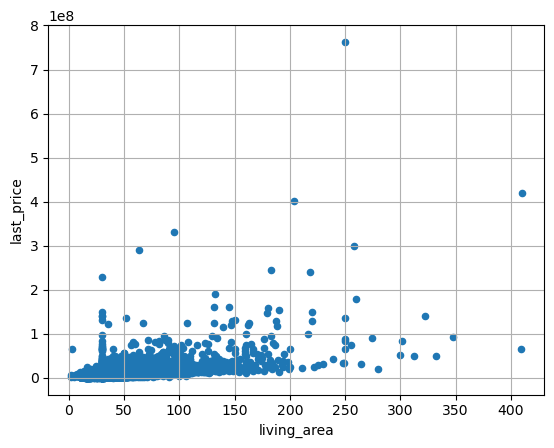

In [45]:
plot_and_correlate(data, 'living_area', 'last_price')

C ростом жилой площади растет и цена, при этом также увеличивается разброс цен на объекты с одинаковой жилой площадью. Однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади

**Зависимость цены от площади кухни:**

Коэффициент корреляции между kitchen_area и last_price: 0.44031561243446554


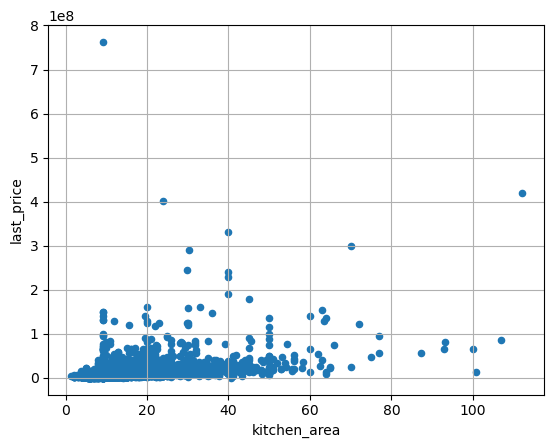

In [46]:
plot_and_correlate(data, 'kitchen_area', 'last_price')

С ростом площади кухни растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей и жилой площади.

**Зависимость цены от количества комнат:**

Коэффициент корреляции между rooms и last_price: 0.3633428499648953


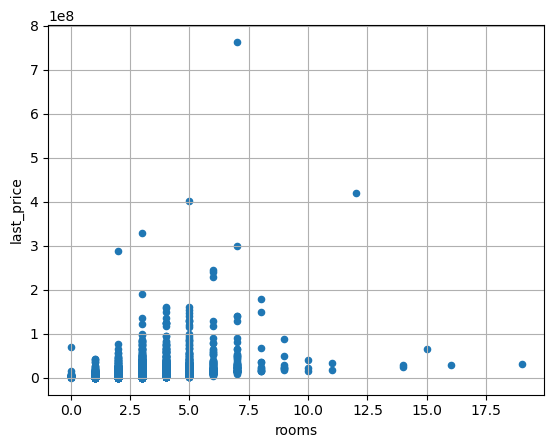

In [47]:
plot_and_correlate(data, 'rooms', 'last_price')

C ростом количества комнат растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади

**Зависимость цены квартиры от этажа**

<Axes: xlabel='floor_type'>

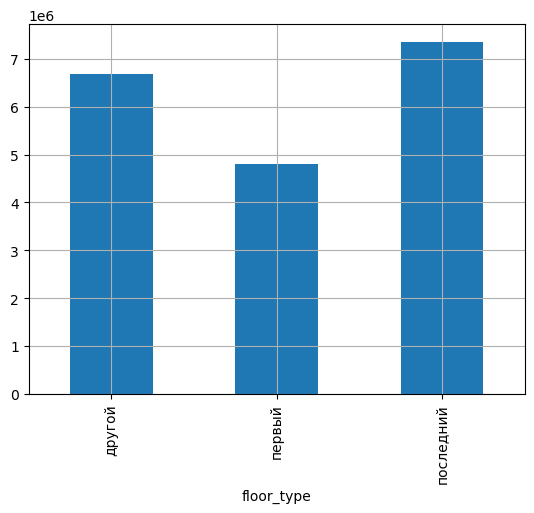

In [48]:
data.groupby('floor_type')['last_price'].mean().plot(kind='bar', grid=True)

Самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся на последнем этаже.

**Зависимость цены от даты размещения**

In [49]:
def plot_average_price_by_date(data, x, y):
    """
    Строит график средней цены по дням публикации.

    data: DataFrame, содержащий данные для построения графика.
    x: Столбец DataFrame для оси X (должен содержать даты).
    y: Столбец DataFrame для оси Y (должен содержать цены).
    """
    # Проверяем, есть ли необходимые столбцы в DataFrame
    if x not in data.columns or y not in data.columns:
        raise ValueError(f"DataFrame должен содержать столбцы '{x}' и '{y}'")
    
    # Создаем сводную таблицу и строим график
    data.pivot_table(index=x, values=y, aggfunc='mean').plot(
        kind='bar',
        grid=True,
        figsize=(10, 6),
    )
    # Добавляем заголовок и метки
    plt.xlabel(x)
    plt.ylabel('Средняя цена')

    # Отображаем график
    plt.show()

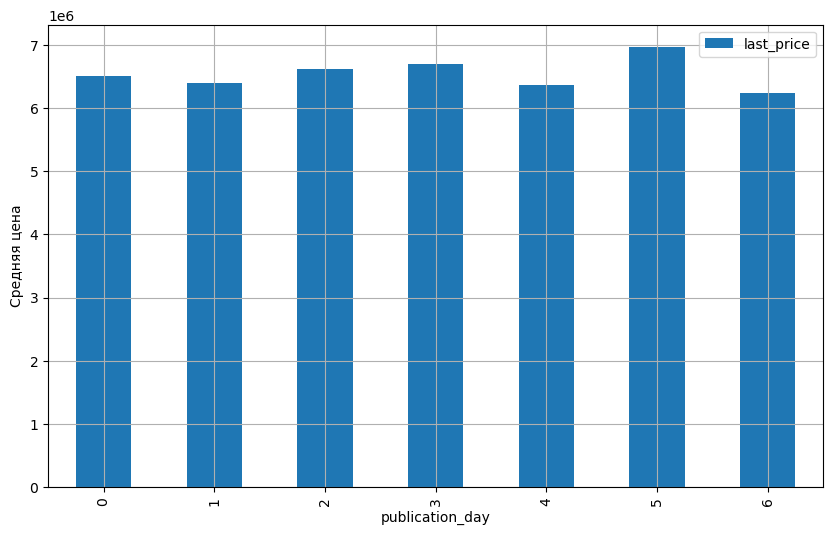

In [50]:
plot_average_price_by_date(data, 'publication_day', 'last_price')

Цена квартиры не зависит сильно от дня недели, в который было опубликовано объявление. Онако можно заметить, что объявления о более дорогих квартирах публикуются в субботу

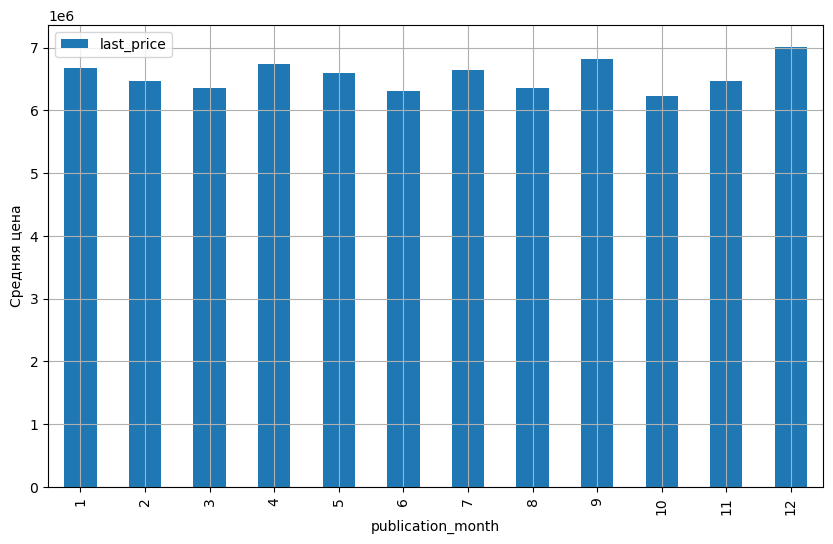

In [51]:
plot_average_price_by_date(data, 'publication_month', 'last_price')

Дешевле всего продавались квартиры, размещенные в объявлениях в октябре, а дороже всего - размещенные в декабре.

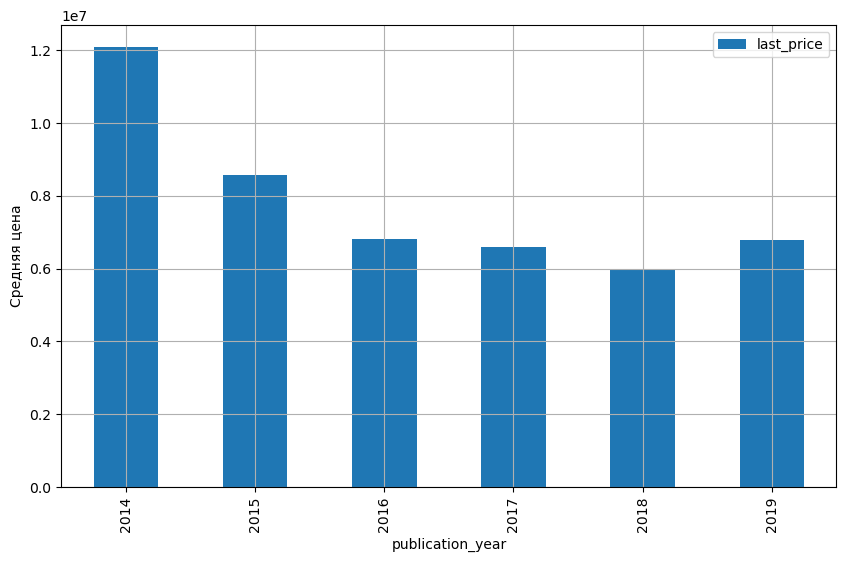

In [52]:
plot_average_price_by_date(data, 'publication_year', 'last_price')

С 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти.
Возможно уменьшение цены связано с уменьшением площади продаваемых квартир

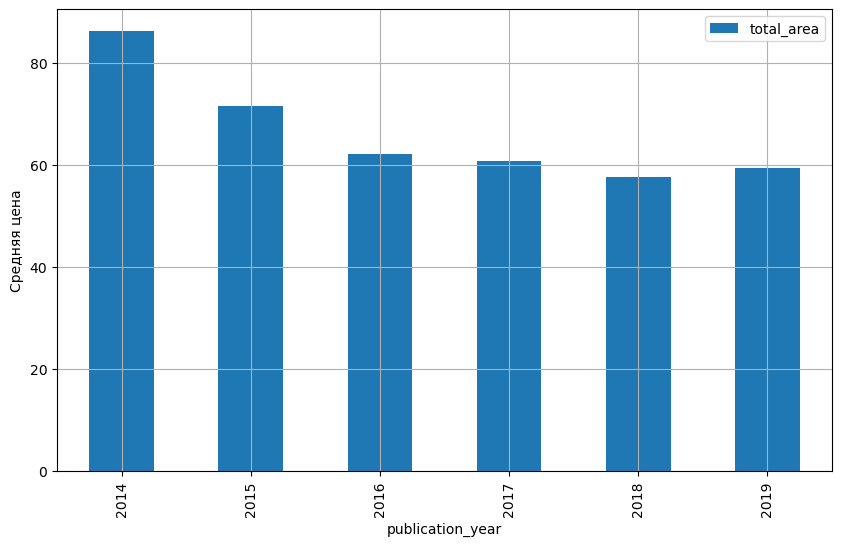

In [53]:
plot_average_price_by_date(data, 'publication_year', 'total_area')

Действительно с 2014 по 2018 годы площадь продаваемых квартир уменьшалась, как и цена на них, в 2019 году площадь возросла и цены начали расти

**Вывод:**

1. Чем больше общая площадь, тем выше стоимость.
2. Число комнат влияет на цену (больше комнат -> больше жилая площадь -> больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
3. Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле.
4. День недели и месяц публикации объявления не влияют на цену.
5. С 2014 года цены на недвижимость падали до 2018. В 2019 снова начали расти. Это может быть связано с изменение площади продаваемых квартир

**Средняя цена 1 кв. метра**

Постиром сводную таблицу с количеством объявлений и средней ценой квадратного метра

In [ ]:
data['price_per_m2'] = data['last_price'] / data['total_area'] # вычисляю цену за квадратный метр

#создаю сводную таблицу
price_per_m2_pivot_table = pd.pivot_table(
    data,
    values='price_per_m2',
    index='locality_name',
    aggfunc=['count', 'median'],
)

price_per_m2_pivot_table.columns = ['number_of_ads', 'median_price_per_m2']

price_per_m2_pivot_table = price_per_m2_pivot_table.sort_values(by='number_of_ads', ascending=False)


Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 

In [ ]:
price_per_m2_pivot_table.head(10)

**Вывод:**

Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.

**Средняя стоимость для Санкт-Петербурга**

In [ ]:
spb_data = data[data['locality_name'] == 'санкт-петербург'] #создаю новую таблицу для Санкт-Петербурга
average_price_by_distance = spb_data.groupby('center_km')['last_price'].mean().reset_index() #группирую данные по расстоянию до центра
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_distance['center_km'], average_price_by_distance['last_price'], marker='o')
plt.title('Зависимость средней стоимости квартир от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартир')
plt.grid()
plt.show()

**Вывод:**

Самые дорогие квартиры в центре города и их стоимость значительно уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость падает не так быстро.

### Напишите общий вывод

В ходе исследования рынка недвижимости и анализа объявлений о продаже квартир были выполнены следующие этапы, а также сделаны соответствующие выводы:

**1. Анализ информации о данных**

В базе данных содержится 23699 записей. Обнаружены пропущенные значения в ряде столбцов, а также некорректные типы данных. На основе гистограмм можно сделать вывод о наличии аномальных значений. Явные дубликаты в данных отсутствуют. В целом, данные были признаны достаточными для дальнейшего анализа.

**2. Предобработка данных**

В процессе предобработки данных были внесены следующие изменения:

Название столбца cityCenters_nearest заменено на сity_centers_nearest

Была ппроизведена замена пропусков в нескольких стобцах. В ceiling_height, floors_total, living_area, kitchen_area пропущенные значения заменены медианными. В столбце balcony пропуски заменены на 0. А в стобце is_apartment на False.

Изменен тип данных в нескольких столбцах. Данные в столбце first_day_exposition теперь имеют тип datetime64. В столбцах floors_total и balcony тип данных заменен на int64. Дааные столбца is_apartment приведены к типу bool.

Столбец locality_name избавлен от неявных дубликатов

**3. Исследовательский анализ данных**

Анализ параметров позволил выявить среднестатистический тип предложения: это квартира в пятиэтажном доме средней площадью 52 квадратных метра, с кухней 6 квадратных метров и высотой потолков 2,65 метра. Скорее всего, это одно- или двухкомнатная квартира, находящаяся на расстоянии 5–13 км от центра города.

Проведен анализ скорости продаж квартир. В среднем квартиры продаются за 180 дней. 25% квартир продается менее чем за 45 дней, такие продажи можно назвать быстрыми. Медленными можно назвать продажи, которое присходят более чем через 7 месяцев после публикации объявления При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более.

**4. Определение факторов влияния на стоимость**

Установлены факторы, оказывающие значительное влияние на общую стоимость квартир:

Корреляция между общей площадью и стоимостью жилья очень высока: чем больше площадь, тем дороже квартира.
Число комнат также влияет на цену (большее количество комнат — больше жилая площадь — высокая цена), хотя зависимость этого параметра от стоимости меньше, поскольку встречаются квартиры с большими комнатами, находящиеся ближе к центру, которые стоят дороже, несмотря на малое количество комнат.
Первый этаж существенно снижает стоимость квартиры, в то время как квартиры на последнем этаже оцениваются несколько выше. Наибольшая стоимость наблюдается у квартир, расположенных между первым и последним этажами.

**5. Анализ средней стоимости квадратного метра**

Изучена средняя стоимость одного квадратного метра в десяти населенных пунктах с наибольшим количеством объявлений.Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.

**6. Вычисление средней стоимости квартиры в зависимости от удаленности от центра**

Выяснено, что самые дорогие квартиры находятся в центре города, а цены снижаются по мере увеличения расстояния до центра, достигая максимального снижения до 7 километров; далее стоимость практически не зависит от расстояния.